# COVID ANALYSIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading Data from csv file

In [4]:
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)


# Displaying the First Few Rows of the DataFrame

In [6]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


# Some details about dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

# Generating Summary Statistics for the DataFrame

In [9]:
data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


# Analyze Total Confirmed Cases:

In [14]:
total_confirmed = data['Confirmed'].sum()
print(f"Total confirmed case globally: {total_confirmed}")

Total confirmed case globally: 16480485


# Total confirmed cases by country (sorted by highest)

In [17]:
confirmed_by_country = data[['Country/Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False)
print(confirmed_by_country)

            Country/Region  Confirmed
173                     US    4290259
23                  Brazil    2442375
79                   India    1480073
138                 Russia     816680
154           South Africa     452529
..                     ...        ...
49                Dominica         18
140  Saint Kitts and Nevis         17
68               Greenland         14
75                Holy See         12
183         Western Sahara         10

[187 rows x 2 columns]


# Calculate total new cases globally

In [19]:
total_new_cases = data['New cases'].sum()
print(f'Total new cases globally: {total_new_cases}')

Total new cases globally: 228693


# # Top 10 countries with the highest new cases

In [20]:
top_new_cases = data[['Country/Region', 'New cases']].sort_values(by='New cases', ascending=False).head(10)
print(top_new_cases) 

    Country/Region  New cases
173             US      56336
79           India      44457
23          Brazil      23284
37        Colombia      16306
132           Peru      13756
154   South Africa       7096
138         Russia       5607
111         Mexico       4973
6        Argentina       4890
13      Bangladesh       2772


# Analyze the 1-week percentage increase in cases

In [21]:
weekly_increase = data[['Country/Region', '1 week % increase']].sort_values(by='1 week % increase', ascending=False).head(10)
print("Countries with the highest 1-week % increase in confirmed cases:")
print(weekly_increase)

Countries with the highest 1-week % increase in confirmed cases:
       Country/Region  1 week % increase
130  Papua New Guinea             226.32
63             Gambia             191.07
11            Bahamas             119.54
186          Zimbabwe              57.85
99              Libya              42.78
58           Ethiopia              42.52
22           Botswana              41.57
97            Lesotho              40.67
160          Suriname              37.44
41         Costa Rica              37.34


In [22]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


# Plotting Total Confirmed Cases by Country

In [26]:
# Sort by confirmed cases and get the top 10 countries
top_10_confirmed = data[['Country/Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False).head(10)


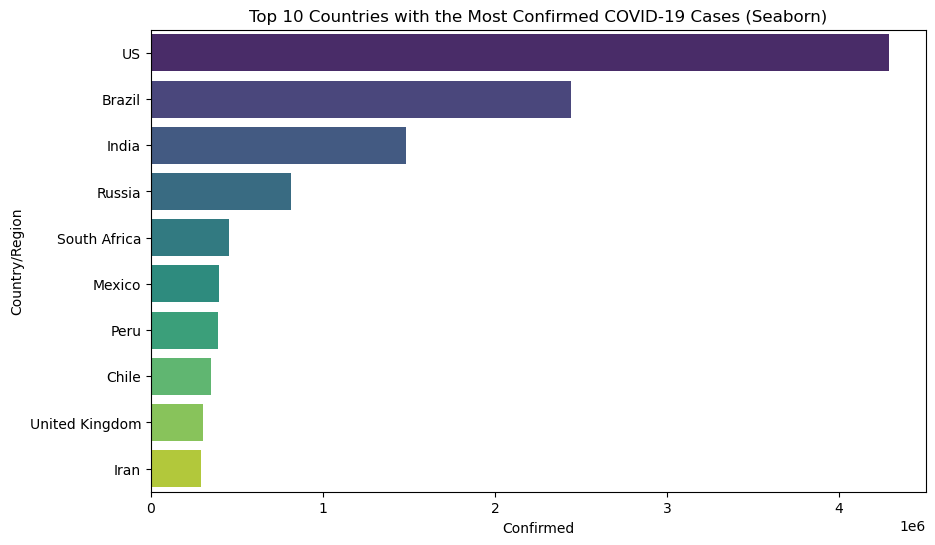

In [27]:
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_confirmed, palette='viridis')
plt.title('Top 10 Countries with the Most Confirmed COVID-19 Cases (Seaborn)')
plt.show()

# New Cases Over Time by Country (Line Plot)

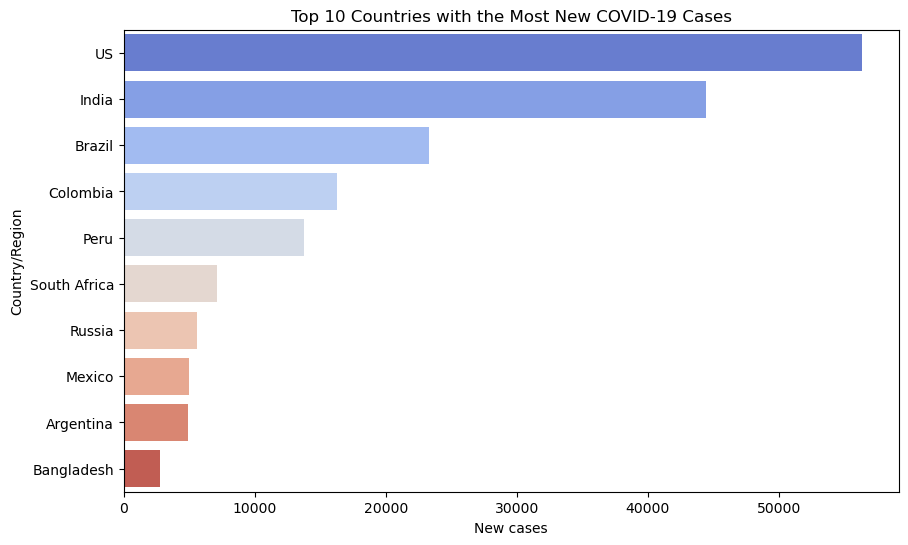

In [28]:
# Sort by new cases and get the top 10 countries
top_10_new_cases = data[['Country/Region', 'New cases']].sort_values(by='New cases', ascending=False).head(10)

# Seaborn bar plot for new cases
plt.figure(figsize=(10, 6))
sns.barplot(x='New cases', y='Country/Region', data=top_10_new_cases, palette='coolwarm')
plt.title('Top 10 Countries with the Most New COVID-19 Cases')
plt.show()

# Heatmap of COVID-19 Statistics

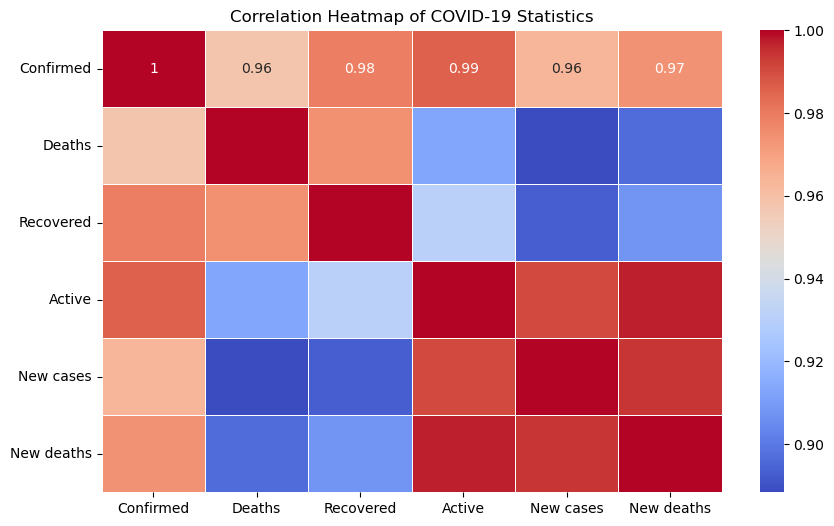

In [29]:
# Select important columns for the heatmap
heatmap_data = data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths']].head(10)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap using seaborn
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of COVID-19 Statistics')
plt.show()

# Weekly Percentage Increase (Scatter Plot)

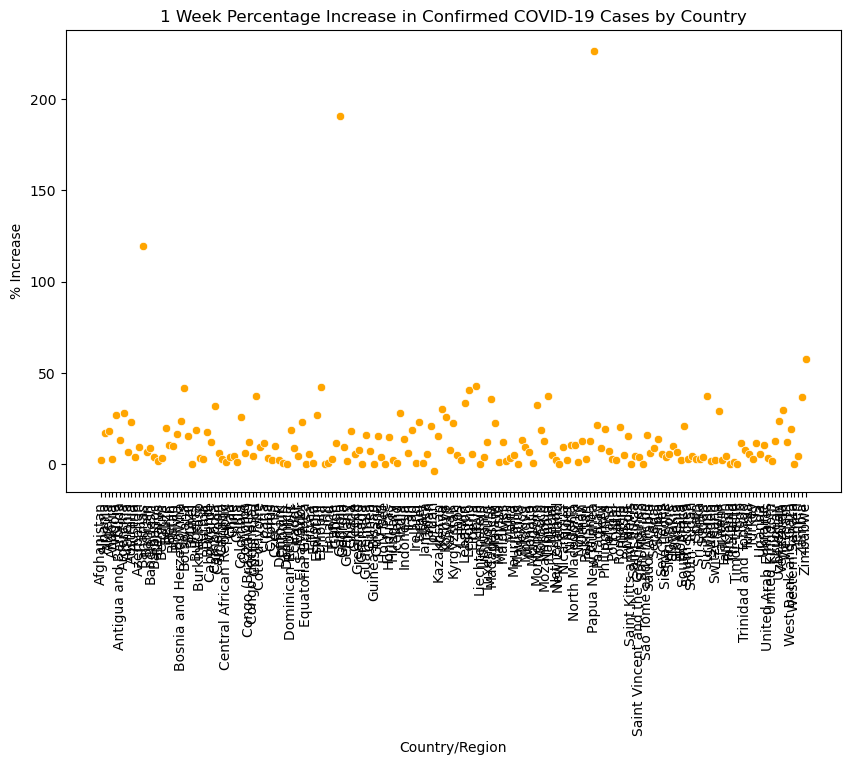

In [30]:
# Drop any rows with missing values in the '1 week % increase' column
weekly_data = data.dropna(subset=['1 week % increase'])

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Country/Region', y='1 week % increase', data=weekly_data, color='orange')

plt.xticks(rotation=90)
plt.title('1 Week Percentage Increase in Confirmed COVID-19 Cases by Country')
plt.ylabel('% Increase')
plt.show()